In [1]:
a = open('Erik/onegramfilteredtfidf.csv', 'rb')

In [5]:
a

#a bunch of import statements for the functions we'll be using
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_selection import SelectKBest
import numpy as np
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [10]:
file = open('Erik/onegramfilteredtfidf.csv', 'rt', encoding = "utf8") 
file

<_io.TextIOWrapper name='Erik/onegramfilteredtfidf.csv' mode='rt' encoding='utf8'>

In [20]:
# Python3
import pkgutil
import os
import encodings

def all_encodings():
    modnames = set(
        [modname for importer, modname, ispkg in pkgutil.walk_packages(
            path=[os.path.dirname(encodings.__file__)], prefix='')])
    aliases = set(encodings.aliases.aliases.values())
    return modnames.union(aliases)

filename = '/tmp/test'
encodings = all_encodings()
for enc in encodings:
    try:
        with open(filename, encoding=enc) as f:
            # print the encoding and the first 500 characters
            print(enc, f.read(500))
    except Exception:
        pass

In [21]:
import pkgutil
import encodings
import os

def all_encodings():
    modnames = set([modname for importer, modname, ispkg in pkgutil.walk_packages(
        path=[os.path.dirname(encodings.__file__)], prefix='')])
    aliases = set(encodings.aliases.aliases.values())
    return modnames.union(aliases)

text = b'\x96'
for enc in all_encodings():
    try:
        msg = text.decode(enc)
    except Exception:
        continue
    if msg == 'ñ':
        print('Decoding {t} with {enc} is {m}'.format(t=text, enc=enc, m=msg))

Decoding b'\x96' with mac_roman is ñ
Decoding b'\x96' with mac_arabic is ñ
Decoding b'\x96' with mac_turkish is ñ
Decoding b'\x96' with mac_romanian is ñ
Decoding b'\x96' with mac_iceland is ñ
Decoding b'\x96' with mac_farsi is ñ
Decoding b'\x96' with mac_croatian is ñ


/Users/stephkim/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: DeprecationWarning: unicode_internal codec has been deprecated


In [25]:
first = True
texts = []
with open('Erik/onegramfilteredtfidf.csv', 'r', encoding='mac_roman') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for line in reader:
        if(first):
            words = line
            first = False
        else:
            texts.append(line[0])
words = words[1:]

['1-kam-ma[1st]NU',
 '1/2[1/2]NU',
 '1/3[1/3]NU',
 '10-kam-ma[10th]NU',
 '1000[1000]NU',
 '100[100]NU',
 '108000[108000]NU',
 '1080[1080]NU',
 '108[108]NU',
 '10[10]NU',
 '11-kam-ma[11th]NU',
 '110[110]NU',
 '1110[1110]NU',
 '116[116]NU',
 '117[117]NU',
 '11[11]NU',
 '12-kam-ma[12th]NU',
 '1200[1200]NU',
 '120[120]NU',
 '123[123]NU',
 '124[124]NU',
 '125[125]NU',
 '126[126]NU',
 '12[12]NU',
 '131[131]NU',
 '1320[1320]NU',
 '132[132]NU',
 '134[134]NU',
 '136[136]NU',
 '137[137]NU',
 '139[139]NU',
 '13[13]NU',
 '140[140]NU',
 '14400[14400]NU',
 '144[144]NU',
 '14[14]NU',
 '15-kam-ma[15th]NU',
 '1500[1500]NU',
 '1525[1525]NU',
 '1560[1560]NU',
 '157[157]NU',
 '159[159]NU',
 '15[15]NU',
 '160[160]NU',
 '161[161]NU',
 '1620[1620]NU',
 '16[16]NU',
 '171[171]NU',
 '177[177]NU',
 '17[17]NU',
 '1800[1800]NU',
 '180[180]NU',
 '181[181]NU',
 '184[184]NU',
 '18600[18600]NU',
 '187[187]NU',
 '18[18]NU',
 '195[195]NU',
 '197[197]NU',
 '1[1]NU',
 '2-kam-ma[2nd]NU',
 '2/3[2/3]NU',
 '201[201]NU',
 '203

In [26]:
print(words[:10]) #print out the first 10 words as a sanity check
print(len(words))

['1-kam-ma[1st]NU', '1/2[1/2]NU', '1/3[1/3]NU', '10-kam-ma[10th]NU', '1000[1000]NU', '100[100]NU', '108000[108000]NU', '1080[1080]NU', '108[108]NU', '10[10]NU']
4302


In [28]:
def doc_name(index):
    return texts[index]

In [31]:
erikcsv = open('Erik/onegramfilteredtfidf.csv', 'r', encoding='mac_roman') 
dtm = np.loadtxt(erikcsv, delimiter=',', skiprows=1, converters = {0: lambda s: 0})
dtm = np.delete(dtm, 0, 1)

In [32]:
dtm_normalized_kmeans = KMeans(n_clusters=7, max_iter=1000).fit(dtm)

In [33]:
labels = dtm_normalized_kmeans.labels_
labels

array([0, 6, 6, 6, 6, 6, 6, 3, 0, 6, 6, 0, 0, 5, 5, 3, 0, 0, 0, 0, 4, 0, 0,
       0, 3, 0, 3, 0, 2, 2, 2, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 1, 1, 1, 4, 1, 1, 1, 5,
       5, 0, 5, 5, 5, 5, 3, 5, 5, 5, 5, 2, 5, 5, 5, 5, 3, 3, 5, 0, 3, 3, 3,
       2, 5, 5, 5, 5, 6, 5, 5, 0, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5,
       4, 5, 5, 2, 6, 5, 5, 6, 6, 5, 5, 0, 5, 5, 5, 5, 2, 5, 6, 6, 2, 6, 6,
       5, 2, 5, 5, 5, 6, 5, 5, 5, 0, 6, 5, 5, 5, 5, 5, 5, 5, 0, 6, 6, 5, 5,
       3, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 5, 0, 6, 5, 6,
       5, 0, 5, 5, 0, 0, 0, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 0, 4, 5, 5, 4, 4, 5, 4, 5, 4, 4, 5,
       4, 5, 4, 5, 5, 5, 5, 6, 5, 0, 4, 4, 5, 5, 5, 3, 5, 0, 0, 0, 5, 5, 4,
       5, 5, 6, 0, 6, 5, 5, 5, 2, 2, 2, 2, 2, 2, 5, 6, 6, 6, 0, 3, 3, 6, 0,
       5, 5,

In [55]:
def inspect_clusters(num_clusters):
    km = KMeans(n_clusters=num_clusters, max_iter=1000).fit(dtm)
    labels = km.labels_
    clusters = {}
    for i in range(num_clusters):
        docs = [j for j in range(len(labels)) if labels[j] == i]
        clusters[i] = [doc_name(k) for k in docs]
    return clusters

In [72]:
words[0]

'1-kam-ma[1st]NU'

In [56]:
three_clusters = inspect_clusters(7)

In [57]:
print(three_clusters[0]) #c.3.1

['c.3.1.02', 'c.3.1.03', 'c.3.1.04', 'c.3.1.05', 'c.3.1.06', 'c.3.1.06.1', 'c.3.1.07', 'c.3.1.08', 'c.3.1.15', 'c.3.1.16', 'c.3.1.19', 'c.3.2.02', 'c.3.2.03', 'c.3.2.04', 'c.3.3.04', 'c.3.3.05', 'c.3.3.08']


In [58]:
print(three_clusters[1]) #c2.6/8

['c.0.1.2', 'c.0.2.01', 'c.0.2.02', 'c.0.2.04', 'c.0.2.06', 'c.0.2.11', 'c.0.2.13', 'c.1.1.3', 'c.1.1.4', 'c.2.3.1', 'c.2.3.2', 'c.2.4.1.2', 'c.2.4.1.3', 'c.2.4.1.5', 'c.2.4.1.6', 'c.2.4.1.a', 'c.2.4.2.01', 'c.2.4.2.03', 'c.2.4.2.04', 'c.2.4.2.07', 'c.2.4.2.15', 'c.2.4.2.16', 'c.2.4.2.17', 'c.2.4.2.18', 'c.2.4.2.22', 'c.2.4.2.24', 'c.2.4.2.25', 'c.2.4.2.b', 'c.2.4.4.6', 'c.2.4.4.a', 'c.2.4.5.1', 'c.2.4.5.2', 'c.2.4.5.3', 'c.2.4.5.4', 'c.2.4.5.5', 'c.2.5.1.3', 'c.2.5.3.1', 'c.2.5.3.2', 'c.2.5.3.3', 'c.2.5.4.01', 'c.2.5.4.02', 'c.2.5.4.03', 'c.2.5.4.04', 'c.2.5.4.05', 'c.2.5.4.08', 'c.2.5.4.09', 'c.2.5.4.11', 'c.2.5.4.13', 'c.2.5.4.17', 'c.2.5.4.19', 'c.2.5.4.21', 'c.2.5.4.23', 'c.2.5.4.24', 'c.2.5.4.27', 'c.2.5.4.29', 'c.2.5.4.b', 'c.2.5.6.1', 'c.2.5.6.2', 'c.2.5.6.4', 'c.2.5.6.5', 'c.2.5.6.6', 'c.2.5.7.2', 'c.2.5.8.1', 'c.2.6.2.1', 'c.2.6.2.a', 'c.2.6.6.1', 'c.2.6.6.5', 'c.2.6.7.1', 'c.2.6.9.2', 'c.2.6.9.3', 'c.2.6.9.4', 'c.2.6.9.5', 'c.2.6.9.6', 'c.2.6.9.7', 'c.2.6.9.8', 'c.2.7.1.1', 

In [59]:
print(three_clusters[2]) #1.3, 2

['c.1.6.1', 'c.1.6.2', 'c.1.6.3', 'c.2.4.2.20', 'c.2.4.2.21', 'c.2.4.4.4', 'c.2.5.2.1', 'c.2.5.4.15', 'c.2.5.5.1', 'c.2.5.5.2', 'c.2.5.5.3', 'c.2.5.5.4', 'c.2.5.5.5', 'c.2.5.6.3', 'c.2.5.7.1', 'c.4.27.01', 'c.4.27.02', 'c.4.27.03', 'c.4.27.04', 'c.4.27.06', 'c.4.27.07']


In [60]:
print(three_clusters[3])

['c.0.2.07', 'c.0.2.08', 'c.1.2.1', 'c.2.2.2', 'c.2.2.4', 'c.2.4.2.14', 'c.2.4.4.1', 'c.2.4.4.2', 'c.2.4.4.3', 'c.2.5.4.a', 'c.2.8.3.1', 'c.4.07.6', 'c.4.07.7', 'c.4.07.9', 'c.4.08.05', 'c.4.08.06', 'c.4.08.08', 'c.4.08.15', 'c.4.08.16', 'c.4.08.18', 'c.4.08.20', 'c.4.08.26', 'c.4.08.30', 'c.4.08.31', 'c.4.08.32', 'c.4.13.02', 'c.4.13.11', 'c.4.13.15', 'c.4.16.2', 'c.4.19.1', 'c.4.19.2', 'c.4.19.3', 'c.4.22.2', 'c.4.25.1', 'c.4.32.e', 'c.4.32.f', 'c.5.5.a', 'c.6.1.21']


In [61]:
print(three_clusters[4])

['c.0.1.1', 'c.0.2.03', 'c.1.1.1', 'c.1.1.2', 'c.1.2.2', 'c.1.3.1', 'c.1.3.2', 'c.1.3.3', 'c.1.3.4', 'c.1.3.5', 'c.1.5.1', 'c.1.7.1', 'c.1.7.4', 'c.1.7.6', 'c.1.7.7', 'c.1.8.1.1', 'c.1.8.1.2', 'c.1.8.1.3', 'c.1.8.1.4', 'c.1.8.1.5', 'c.1.8.1.5.1', 'c.1.8.2.1', 'c.1.8.2.2', 'c.1.8.2.3', 'c.1.8.2.4', 'c.2.1.1', 'c.2.1.2', 'c.2.1.3', 'c.2.1.4', 'c.2.1.5', 'c.2.1.6', 'c.2.1.7', 'c.2.2.3', 'c.2.2.5', 'c.2.2.6', 'c.2.4.1.1', 'c.2.4.1.4', 'c.2.4.1.7', 'c.2.4.2.02', 'c.2.4.2.05', 'c.2.4.3.1', 'c.2.5.1.2', 'c.2.6.9.1', 'c.2.8.2.1', 'c.2.8.5.a', 'c.3.1.01', 'c.3.1.11', 'c.3.1.11.1', 'c.3.1.13.2', 'c.3.1.17', 'c.3.1.18', 'c.3.1.20', 'c.3.1.21', 'c.3.2.05', 'c.3.3.01', 'c.3.3.02', 'c.3.3.03', 'c.3.3.09', 'c.3.3.10', 'c.3.3.11', 'c.3.3.39', 'c.4.06.1', 'c.4.07.3', 'c.4.07.5', 'c.4.08.23', 'c.4.13.04', 'c.4.13.06', 'c.4.14.1', 'c.4.14.2', 'c.4.14.3', 'c.4.23.1', 'c.4.32.2', 'c.4.33.2', 'c.5.1.3', 'c.5.2.4', 'c.5.2.5', 'c.5.3.1', 'c.5.3.2', 'c.5.3.3', 'c.5.3.5', 'c.5.3.6', 'c.5.3.7', 'c.5.4.11', 'c.5.

In [62]:
print(three_clusters[5])

['c.1.7.8', 'c.2.5.1.4', 'c.2.5.3.4', 'c.2.8.5.b', 'c.3.3.21', 'c.4.22.1', 'c.4.22.4', 'c.4.22.5', 'c.4.22.6', 'c.5.7.2']


In [63]:
print(three_clusters[6])

['c.1.4.1', 'c.1.4.1.1', 'c.1.4.1.3', 'c.1.4.3', 'c.1.4.4', 'c.1.7.3', 'c.2.4.2.26', 'c.2.4.2.a', 'c.2.5.4.10', 'c.4.07.8', 'c.4.08.01', 'c.4.08.02', 'c.4.08.03', 'c.4.08.04', 'c.4.08.07', 'c.4.08.09', 'c.4.08.10', 'c.4.08.25', 'c.4.08.28', 'c.4.08.29', 'c.4.08.33', 'c.4.08.a']


In [53]:
a = inspect_clusters(3)

In [ ]:
print(a[0])

Automatically created module for IPython interactive environment


/Users/stephkim/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:57: RuntimeWarning: divide by zero encountered in true_divide


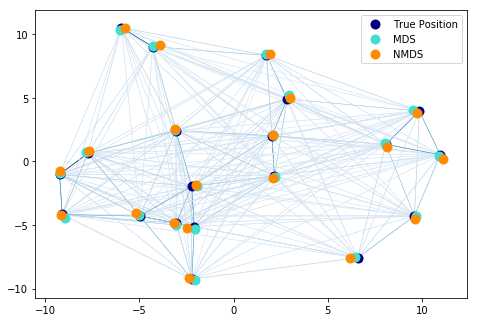

In [64]:
print(__doc__)
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

n_samples = 20
seed = np.random.RandomState(seed=3)
X_true = seed.randint(0, 20, 2 * n_samples).astype(np.float)
X_true = X_true.reshape((n_samples, 2))
# Center the data
X_true -= X_true.mean()

similarities = euclidean_distances(X_true)

# Add noise to the similarities
noise = np.random.rand(n_samples, n_samples)
noise = noise + noise.T
noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
similarities += noise

mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_

nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)
npos = nmds.fit_transform(similarities, init=pos)

# Rescale the data
pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
npos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((npos ** 2).sum())

# Rotate the data
clf = PCA(n_components=2)
X_true = clf.fit_transform(X_true)

pos = clf.fit_transform(pos)

npos = clf.fit_transform(npos)

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

s = 100
plt.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=s, lw=0,
            label='True Position')
plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
plt.scatter(npos[:, 0], npos[:, 1], color='darkorange', s=s, lw=0, label='NMDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

similarities = similarities.max() / similarities * 100
similarities[np.isinf(similarities)] = 0

# Plot the edges
start_idx, end_idx = np.where(pos)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[X_true[i, :], X_true[j, :]]
            for i in range(len(pos)) for j in range(len(pos))]
values = np.abs(similarities)
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.Blues,
                    norm=plt.Normalize(0, values.max()))
lc.set_array(similarities.flatten())
lc.set_linewidths(0.5 * np.ones(len(segments)))
ax.add_collection(lc)

plt.show()


In [66]:

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs

from pandas.tools.plotting import parallel_coordinates

In [68]:
a, b, c, d, e, f, g = make_blobs(n_samples=200, centers=10, n_features=7, random_state=0)


ValueError: not enough values to unpack (expected 7, got 2)

In [70]:
import numpy as np
from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances
from sklearn.datasets import make_classification

data, labels = make_classification()
mds = MDS(n_components=2)

similarities = euclidean_distances(data.astype(np.float64))
print(np.abs(similarities - similarities.T).max())
# Prints 1.7763568394e-15
mds.fit(data.astype(np.float64))
# Succeeds

similarities = euclidean_distances(data.astype(np.float32))
print(np.abs(similarities - similarities.T).max())
# Prints 9.53674e-07
mds.fit(data.astype(np.float32))
# Fails with "ValueError: similarities must be symmetric"

1.7763568394e-15
9.53674e-07


MDS(dissimilarity='euclidean', eps=0.001, max_iter=300, metric=True,
  n_components=2, n_init=4, n_jobs=1, random_state=None, verbose=0)

In [73]:
import numpy as np
from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances
from sklearn.datasets import make_classification

data, labels = make_classification()
mds = MDS(n_components=7)

similarities = euclidean_distances(data.astype(np.float64))
print(np.abs(similarities - similarities.T).max())
# Prints 1.7763568394e-15
mds.fit(data.astype(np.float64))
# Succeeds

similarities = euclidean_distances(data.astype(np.float32))
print(np.abs(similarities - similarities.T).max())
# Prints 9.53674e-07
mds.fit(data.astype(np.float32))
# Fails with "ValueError: similarities must be symmetric"

1.7763568394e-15
9.53674e-07


MDS(dissimilarity='euclidean', eps=0.001, max_iter=300, metric=True,
  n_components=7, n_init=4, n_jobs=1, random_state=None, verbose=0)